# 1. Dependências e ajuste no dataset

In [390]:
## Load dependencies.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from global_functions import dynamic_group
from global_functions import self_scatter
from scipy.stats import mstats

In [391]:
## Load main dataset.
df = pd.read_csv('bases-ajustadas/operacoes-integrado.csv')
pib = pd.read_csv('bases-auxiliares/pib-integrado.csv')
seeg = pd.read_csv('bases-auxiliares/SEEG-emissao-ajustado.csv')
idh = pd.read_csv('bases-auxiliares/idhm.csv')
caged = pd.read_csv('bases-auxiliares/CAGED-ajustado.csv')

In [281]:
## Define sns style.
sns.set_style("darkgrid")


# 2. Análise gráfica de tendências para sustentabilidade

## 2.1 - Ajuste dos dados

In [ ]:
## Make a copy of main dataset
df_finem = df.copy(deep=True)

## SUbset BNDES FINEM
df_finem = df_finem[df_finem['produto'] == 'BNDES FINEM']

## Group by uf-ano-setor
gvars = ['uf', 'ano', 'setor_bndes']
rules = {'valor_desembolsado_ajustado': 'sum', 'emissao_co2': 'mean'}
df_finem = dynamic_group(df_finem, gvars, rules)


In [ ]:
## Make set one dataset for each sector.
df_ind = df_finem.copy(deep=True)
df_agro = df_finem.copy(deep=True)

## Subset 'INDUSTRIA' and 'AGROPECUARIA'.
df_ind = df_ind[df_ind['setor_bndes'] == 'INDUSTRIA']
df_agro = df_agro[df_agro['setor_bndes'] == 'AGROPECUARIA']


In [ ]:
## Make set one dataset for each sector.
seeg_ind = seeg.copy(deep=True)
seeg_agro = seeg.copy(deep=True)

## Subset 'INDUSTRIA' and 'AGROPECUARIA'.
seeg_ind = seeg_ind[seeg_ind['setor'] == 'INDUSTRIA']
seeg_agro = seeg_agro[seeg_agro['setor'] == 'AGROPECUARIA']


## 2.2 - Relação do desembolso BNDES FINEM com maiores estados emissores de co2

Vamos analisar a relação dos desembolsos do BNDES FINEM para Indústria e Agropecuária com a evolução de emissao de co_2 dessas áreas

### 2.2.1 - TOP3 emissao de co2 para a Indústria

In [285]:
## Get top3 emissors.
gvars = ['uf']
rules = { 'emissao_co2': 'sum'}
uf_ind = dynamic_group(seeg_ind, gvars, rules).nlargest(
    3, 'emissao_co2')['uf']


In [286]:
## Subset dataset for those states.
top_ind = seeg_ind[seeg_ind['uf'].isin(uf_ind)]

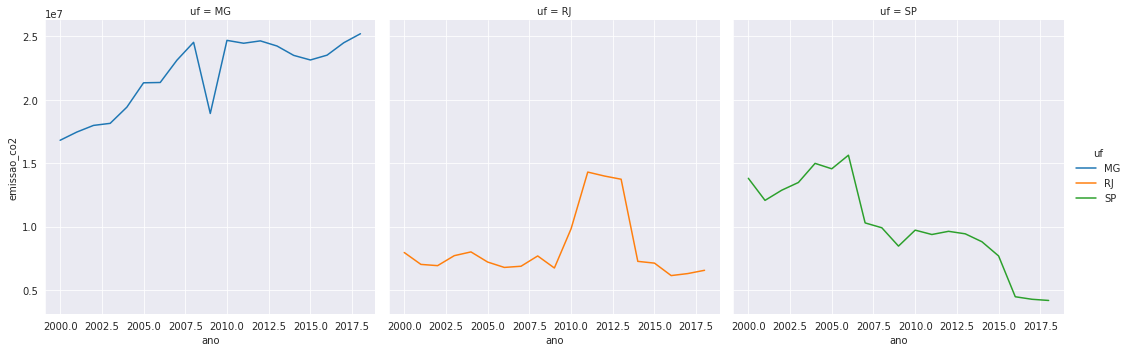

In [287]:
plot1 = sns.relplot(
    data=top_ind,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

### 2.2.2- TOP3 emissao de co2 para Agropecuaria

In [288]:
## Get top3 emissors.
gvars = ['uf']
rules = {'emissao_co2': 'sum'}
uf_agro = dynamic_group(seeg_agro, gvars, rules).nlargest(
    3, 'emissao_co2')['uf']


In [289]:
## Subset dataset for those states.
top_agro = seeg_agro[seeg_agro['uf'].isin(uf_agro)]

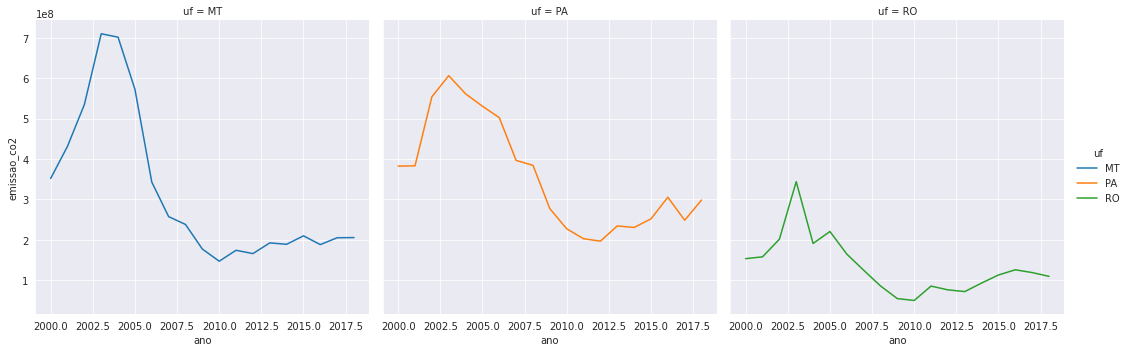

In [290]:
plot2 = sns.relplot(
    data=top_agro,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 2.2.3 - Desembolso para indústria

In [291]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

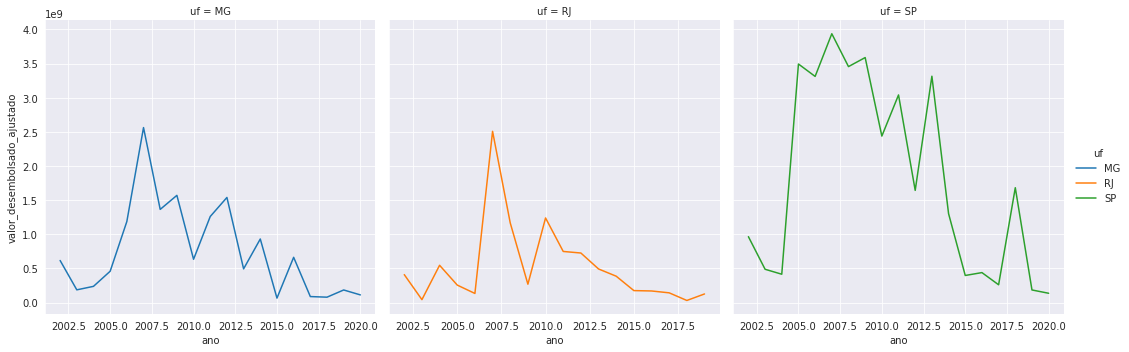

In [292]:
plot3 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 2.2.4 Desembolso para Agropecuária

In [293]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

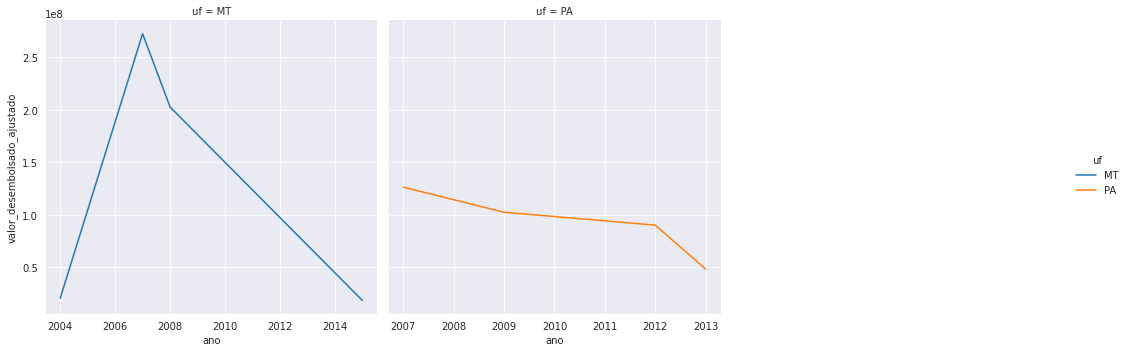

In [294]:
## Plot.
plot4 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


## 2.3 - Relação do desembolso BNDES FINEM com menores estados emissores de co2

Vamos analisar a relação dos desembolsos do BNDES FINEM para Indústria e Agropecuária com a evolução de emissao de co_2 dessas áreas.

### 2.3.1 - Menores emissores de co2 para a Indústria

In [311]:
## Get smallest non zero emissors
gvars = ['uf']
rules = {'emissao_co2': 'sum'}
data = seeg_ind.loc[seeg_ind.ne(0).all(axis=1)]
uf_ind = dynamic_group(data, gvars, rules).nsmallest(
    3, 'emissao_co2')['uf']

In [312]:
## Subset dataset for those states.
small_ind = seeg_ind[seeg_ind['uf'].isin(uf_ind)]

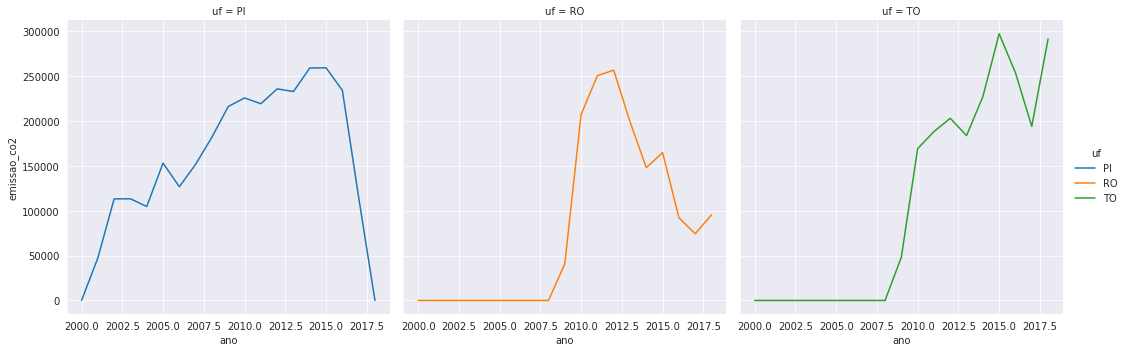

In [313]:
plot5 = sns.relplot(
    data=small_ind,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 2.3.2 - Menores emissores de co2 para a Agropecuária

In [314]:
## Get smallest non zero emissors
gvars = ['uf']
rules = {'emissao_co2': 'sum'}
data = seeg_agro.loc[seeg_agro.ne(0).all(axis=1)]
uf_agro = dynamic_group(data, gvars, rules).nsmallest(
    3, 'emissao_co2')['uf']

In [315]:
## Subset dataset for those states.
small_agro = seeg_agro[seeg_agro['uf'].isin(uf_agro)]


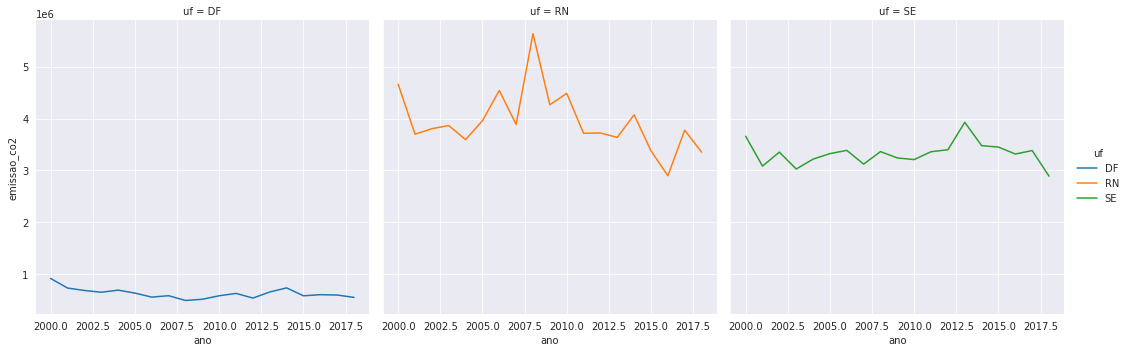

In [316]:
plot6 = sns.relplot(
    data=small_agro,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 2.3.3 - Desembolso para Indústria

In [318]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

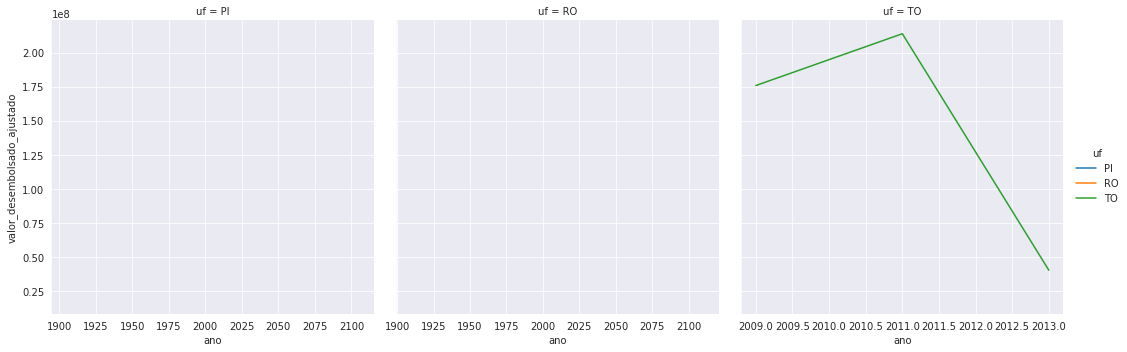

In [319]:
plot7 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 2.3.4 - Desembolso para agropecuária

In [320]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

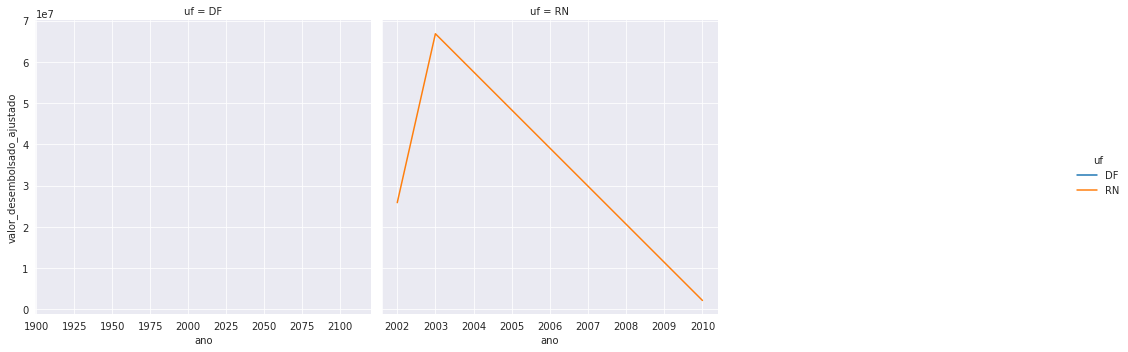

In [321]:
plot8 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

# 3 - Análise gráfica de tendências econômicas

## 3.1 - Ajuste dos dados

In [392]:
## Define columns to drop.
drop_columns = ['data_da_contratacao', 'valor_contratado_reais', 'valor_desembolsado_reais',
                'fonte_de_recurso_desembolsos', 'custo_financeiro', 'modalidade_de_apoio', 'produto',
                'instrumento_financeiro', 'inovacao', 'area_operacional', 'mes', 'igpm']

df.drop(drop_columns, axis=1, inplace=True)

## Group.
df = df.groupby(['numero_do_contrato'], as_index=False).agg(
    {'cliente': ['first'], 'cnpj': ['first'], 'uf': ['first'], 'juros': ['mean'], 'prazo_carencia_meses': ['mean'],
     'prazo_amortizacao_meses': ['mean'], 'setor_bndes': ['first'], 'subsetor_bndes': ['first'],
     'porte_do_cliente': ['first'], 'natureza_do_cliente': ['first'], 'tipo_de_garantia': ['first'],
     'situacao_do_contrato': ['first'], 'valor_contratado_ajustado': ['sum'], 'valor_desembolsado_ajustado': ['sum'],
     'ano': ['first'], 'num_empregados': ['mean'], 'emissao_co2': ['mean'], 'pib': ['mean'], 'idhm': ['mean'], 'processos': ['mean']})

## Melt multi-index.
df.columns = list(map(''.join, df.columns.values))

## Rename columns.
df.columns = ['numero_do_contrato', 'cliente', 'cnpj', 'uf', 'juros',
              'prazo_carencia_meses', 'prazo_amortizacao_meses', 'setor_bndes', 'subsetor_bndes',
              'porte_do_cliente', 'natureza_do_cliente', 'tipo_de_garantia', 'situacao_do_contrato',
              'valor_contratado_ajustado', 'valor_desembolsado_ajustado', 'ano', 'num_empregados',
              'emissao_co2', 'pib', 'idh', 'processos']

## Round.
df['juros'] = df['juros'].round(2)


In [393]:
## Subset PIB dataset
pib_ind = pib[pib['setor'] == 'INDUSTRIA']
pib_agro = pib[pib['setor'] == 'AGROPECUARIA']

In [394]:
df_ind = df[df['setor_bndes'] == 'INDUSTRIA']
df_agro = df[df['setor_bndes'] == 'AGROPECUARIA']


## 3.2 - Relação dos desembolsos BNDES com maiores pibs 

### 3.2.1 - TOP3 pib para Indústria

In [395]:
## Get top3 pib.
gvars = ['uf']
rules = {'pib': 'sum'}
uf_ind = dynamic_group(pib_ind, gvars, rules).nlargest(3, 'pib')['uf']


In [396]:
## Subset dataset for those states.
top_ind = pib_ind[pib_ind['uf'].isin(uf_ind)]


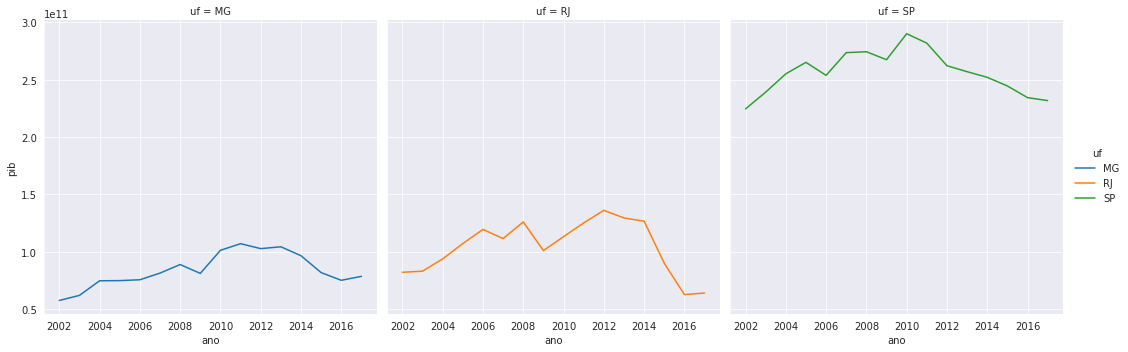

In [397]:
plot9 = sns.relplot(
    data=top_ind,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)

### 3.2.2 - TOP3 pib para Agropecuária

In [380]:
## Get top3 pib.
gvars = ['uf']
rules = {'pib': 'sum'}
uf_agro = dynamic_group(pib_agro,
                       gvars, rules).nlargest(3, 'pib')['uf']

In [381]:
## Subset dataset for those states.
top_agro = pib_agro[pib_agro['uf'].isin(uf_agro)]

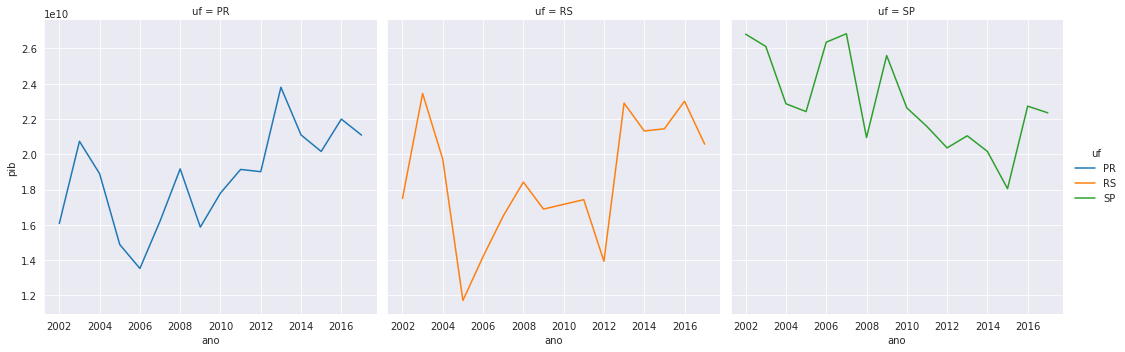

In [382]:
plot10 = sns.relplot(
    data=top_agro,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 3.2.3 - Desembolso para Indústria

In [398]:
## Subset dataset for those states.
des_ind = df_ind[df_ind['uf'].isin(uf_ind)]

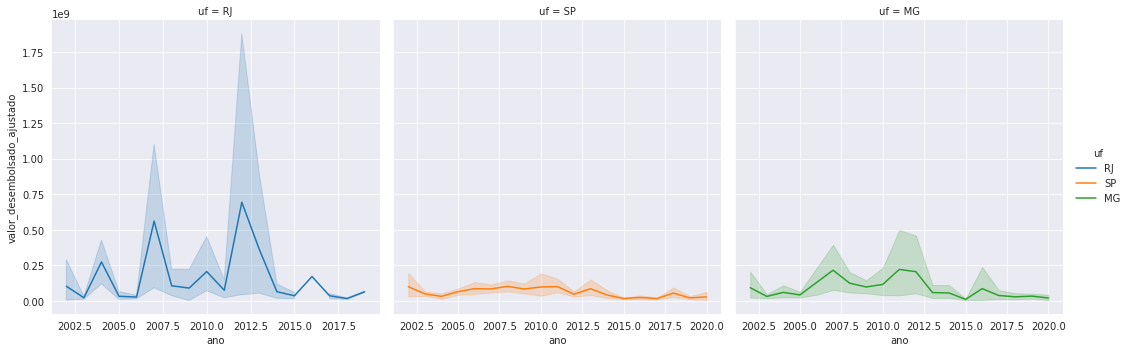

In [399]:
## Plot.
plot11 = sns.relplot(
    data=des_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


### 3.2.4 - Desembolso para Agropecuária

In [388]:
## Subset dataset for those states.
des_agro = df_agro[df_agro['uf'].isin(uf_agro)]

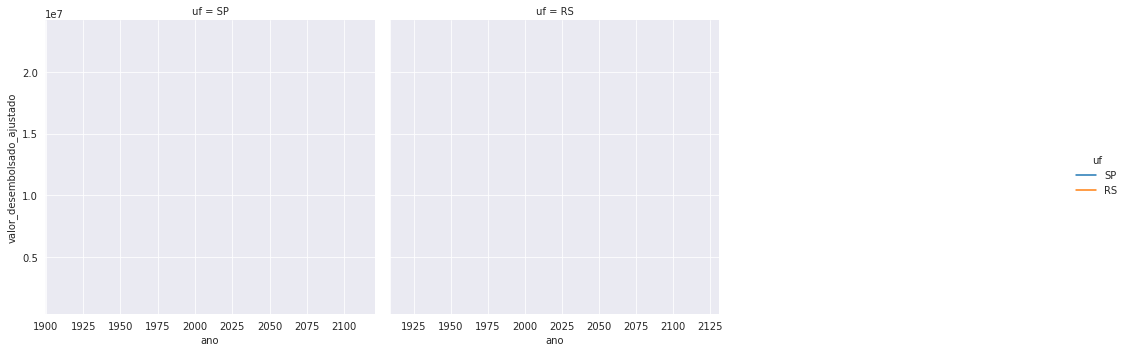

In [389]:
## Plot.
plot12 = sns.relplot(
    data=des_agro,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=5, aspect=1, facet_kws=dict(sharex=False), col_wrap=3,
)


## 2.1 - Desembolso (Industria e Agropecuaria) por estado

In [63]:
## Make a copy of main dataset
df_ind = df.copy(deep=True)

## Subset 'INFRAESTRUTURA'
df_ind = df_ind[df_ind['setor_bndes'] != 'INFRAESTRUTURA']

## Group by uf-ano
gvars = ['uf', 'ano']
rules = {'valor_desembolsado_ajustado': 'sum', 'num_empregados': 'mean',
         'emissao_co2': 'mean', 'pib': 'mean', 'idh': 'mean', 'processos': 'sum'}
df_ind = dynamic_group(df_ind, gvars, rules)


In [64]:
## Log variable to a be a more coherent scale
df_ind['valor_desembolsado_ajustado'] = np.log(
    df_ind['valor_desembolsado_ajustado'])


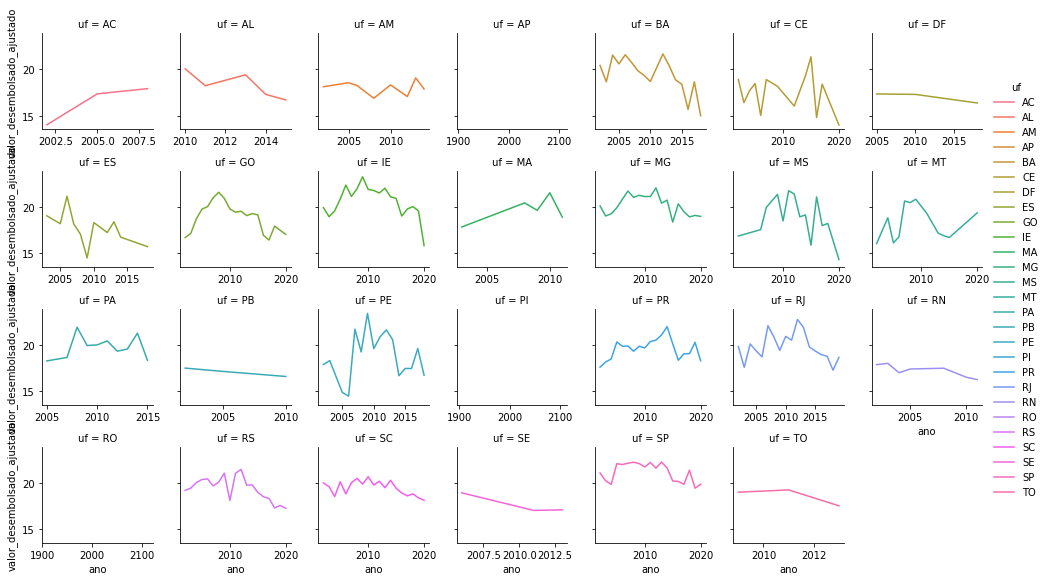

In [65]:
plot1 = sns.relplot(
    data=df_ind,
    x="ano", y="valor_desembolsado_ajustado",
    hue="uf", col="uf",
    kind="line",
    height=2, aspect=1, facet_kws=dict(sharex=False), col_wrap=7,
)


## 2.2 - PIB (Industria e Agropecuaria) por estado

In [86]:
## Group by uf-ano
gvars = ['uf', 'ano']
rules = {'pib': 'sum'}
pib = dynamic_group(pib, gvars, rules)


In [88]:
## Log variable to a be a more coherent scale
pib['pib'] = np.log(
    pib['pib'])

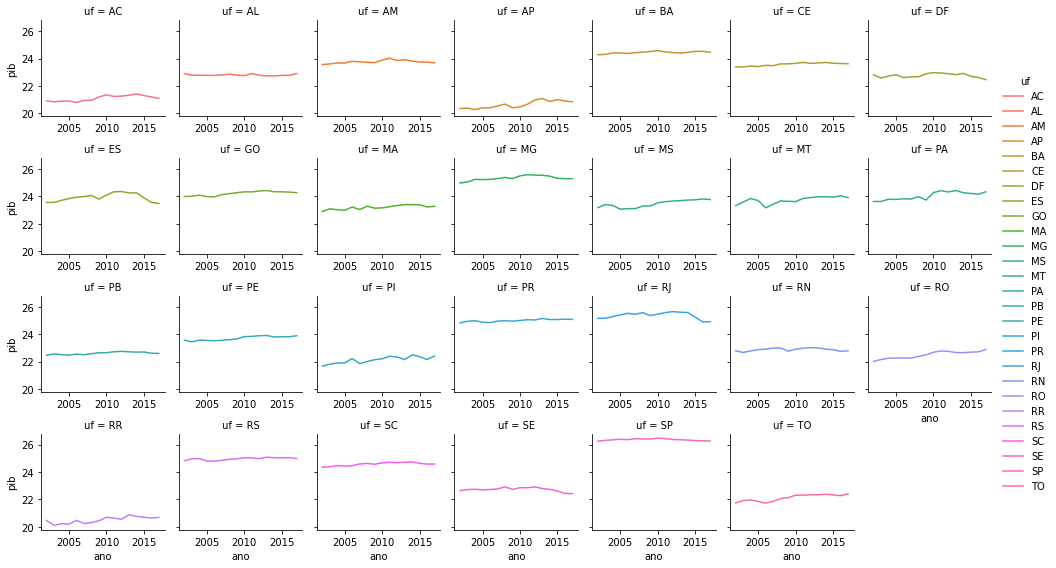

In [89]:
plot2 = sns.relplot(
    data=pib,
    x="ano", y="pib",
    hue="uf", col="uf",
    kind="line",
    height=2, aspect=1, facet_kws=dict(sharex=False), col_wrap=7,
)

## 2.3 - Empregos (Indústria e Agropecuaria) por estado 

In [92]:
## Subset 'CONSTRUCAO CIVIL'
caged = caged[caged['setor'] != 'CONSTRUCAO CIVIL']

In [93]:
## Group by uf-ano
gvars = ['uf', 'ano']
rules = {'num_empregados': 'sum'}
caged = dynamic_group(caged, gvars, rules)

In [95]:
## Log variable to a be a more coherent scale
caged['num_empregados'] = np.log(
    caged['num_empregados'])

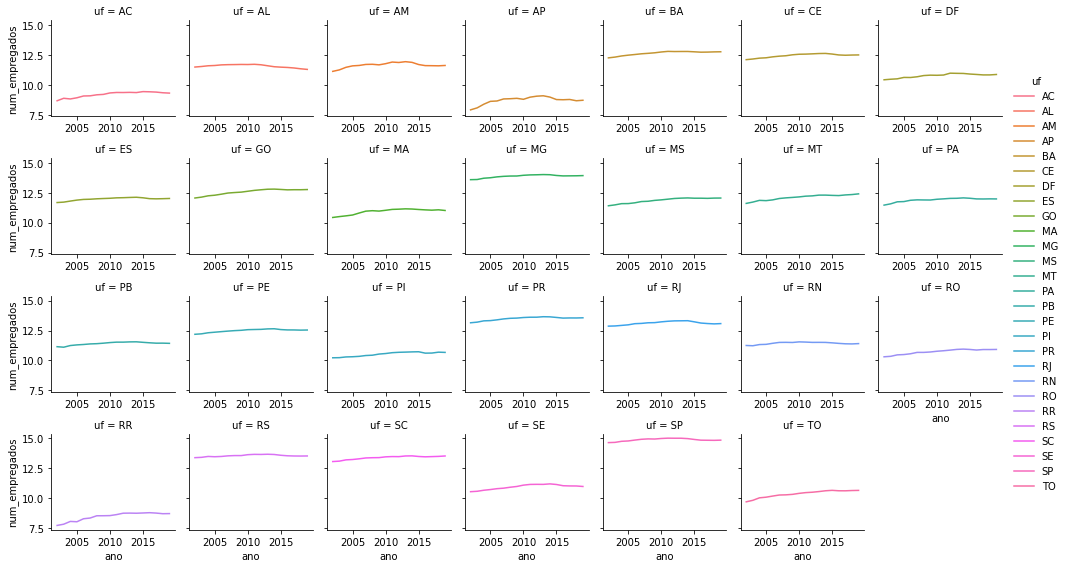

In [96]:
plot3 = sns.relplot(
    data=caged,
    x="ano", y="num_empregados",
    hue="uf", col="uf",
    kind="line",
    height=2, aspect=1, facet_kws=dict(sharex=False), col_wrap=7,
)


## 2.4 - IDH por estado

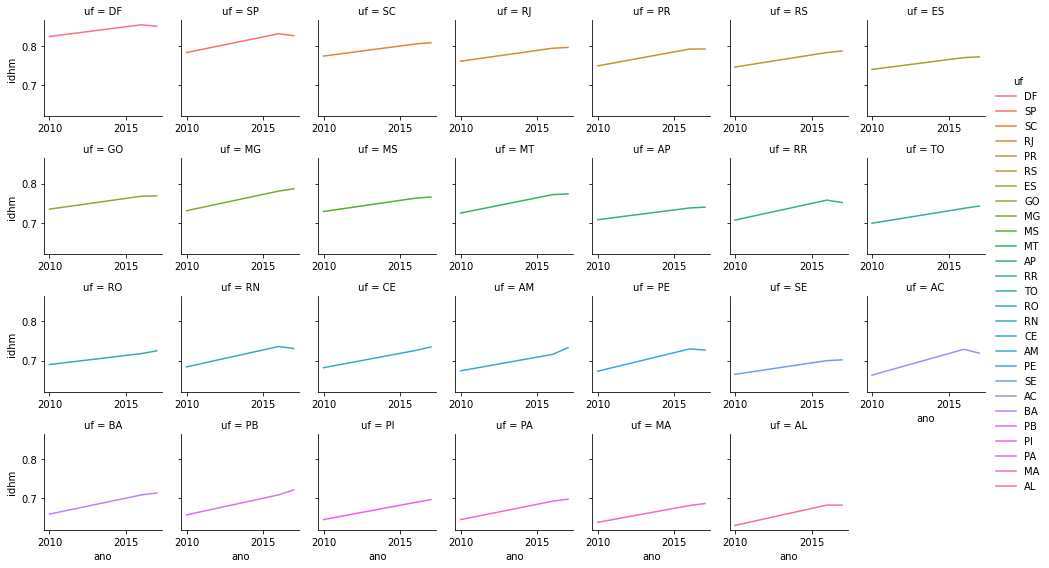

In [99]:
plot4 = sns.relplot(
    data=idh,
    x="ano", y="idhm",
    hue="uf", col="uf",
    kind="line",
    height=2, aspect=1, facet_kws=dict(sharex=False), col_wrap=7,
)

## 2.5 - Emissao de CO2 (Indústria e Agropecuária) por estado

In [101]:
## Group by uf-ano
gvars = ['uf', 'ano']
rules = {'emissao_co2': 'sum'}
seeg = dynamic_group(seeg, gvars, rules)

In [103]:
## Log variable to a be a more coherent scale
seeg['emissao_co2'] = np.log(
    seeg['emissao_co2'])

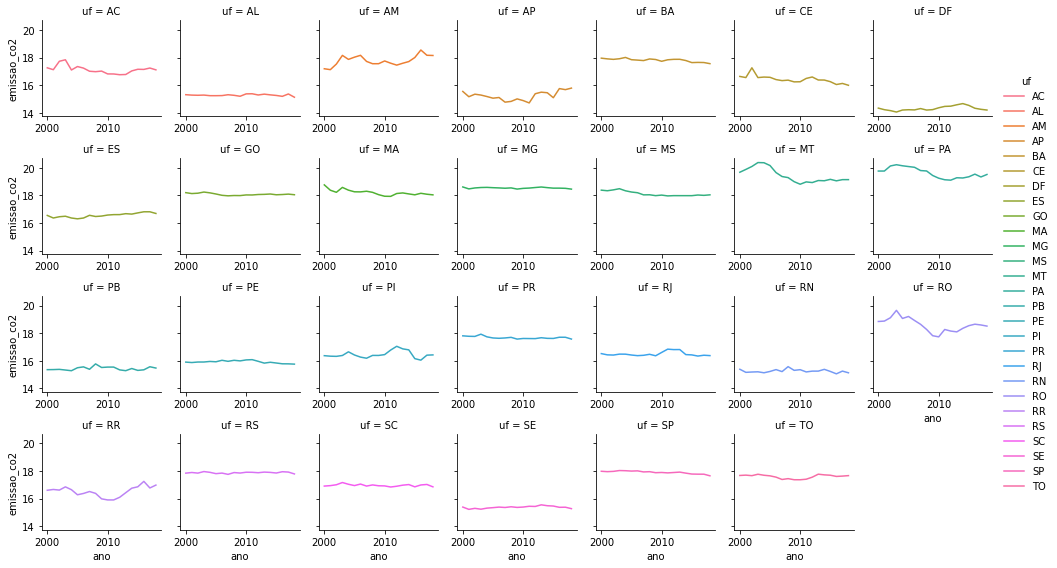

In [104]:
plot5 = sns.relplot(
    data=seeg,
    x="ano", y="emissao_co2",
    hue="uf", col="uf",
    kind="line",
    height=2, aspect=1, facet_kws=dict(sharex=False), col_wrap=7,
)